In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
plt.style.use('default')

In [3]:
df = pd.read_csv ('micro/microdados_enem_2022/DADOS/MICRODADOS_ENEM_2022.csv', sep=';', encoding='latin1', decimal=',')

filtro_treineiro = df['IN_TREINEIRO'] == 0
filtro_CN = df['TP_PRESENCA_CN'] == 1
filtro_CH = df['TP_PRESENCA_CH'] == 1
filtro_LC = df['TP_PRESENCA_LC'] == 1
filtro_MT = df['TP_PRESENCA_MT'] == 1

# quando voce faz um filtro, o ideal eh voce aplicar todos os filtros no df de uma vez porque a cada filtro que voce coloca, muda o indice. 
todos_filtros = filtro_treineiro & filtro_CN & filtro_CH & filtro_LC & filtro_MT
df = df[todos_filtros]

# valores = df.value_counts('TP_PRESENCA_CN')
df.head(10)

,NU_INSCRICAO,NU_ANO,TP_FAIXA_ETARIA,TP_SEXO,TP_ESTADO_CIVIL,TP_COR_RACA,TP_NACIONALIDADE,TP_ST_CONCLUSAO,TP_ANO_CONCLUIU,TP_ESCOLA,...,Q016,Q017,Q018,Q019,Q020,Q021,Q022,Q023,Q024,Q025
2,210057280536,2022,5,F,1,2,1,1,2,1,...,A,A,A,A,A,A,C,A,A,B
3,210055724397,2022,6,M,1,3,1,1,2,1,...,B,A,A,C,A,A,C,B,B,B
7,210055778089,2022,6,F,1,2,1,1,0,1,...,B,A,A,C,A,A,E,A,A,B
9,210055461467,2022,4,F,1,3,1,1,1,1,...,A,A,A,B,A,A,B,A,A,B
11,210054972570,2022,2,F,1,1,1,2,0,3,...,A,A,A,B,A,A,C,A,A,B
18,210057551883,2022,8,F,1,2,1,1,5,1,...,A,A,A,B,A,A,D,A,A,B
22,210056235859,2022,4,F,1,1,1,1,0,1,...,B,A,A,B,B,A,C,A,B,B
23,210057706656,2022,4,M,1,3,1,1,1,1,...,A,A,A,C,A,A,B,A,A,B
25,210055139127,2022,5,M,1,3,1,1,4,1,...,B,A,A,A,A,A,A,A,A,B
27,210057728624,2022,7,M,1,2,1,1,3,1,...,B,A,A,B,B,A,D,A,B,B


<Figure size 1500x1500 with 0 Axes>

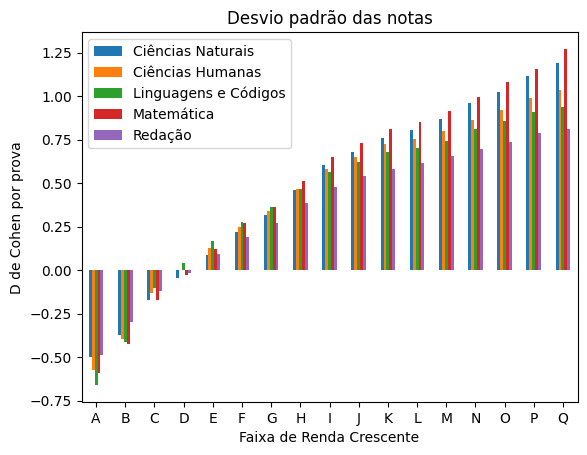

2          E
3          C
7          E
9          E
11         E
          ..
3476095    E
3476097    H
3476098    H
3476099    C
3476102    E
Name: Q001, Length: 1927753, dtype: object


,NU_NOTA_CN,NU_NOTA_CH,NU_NOTA_LC,NU_NOTA_MT,NU_NOTA_REDACAO
Q006,,,,,
A,460.918065,484.072503,469.190659,472.753803,528.090753
B,470.120183,498.703523,488.232441,492.361815,566.817180
C,484.818665,519.804747,512.101652,521.945766,603.136416
D,494.026495,530.688386,523.237005,538.826209,624.016540
E,503.767601,541.047275,532.885975,556.258190,646.754104


In [4]:
columns_to_convert = ['NU_NOTA_CN', 'NU_NOTA_CH','NU_NOTA_LC','NU_NOTA_MT','NU_NOTA_REDACAO'] 
for column in columns_to_convert:
    df[column] = df[column].astype(float)

df_agrupado = df.groupby('Q006')[['NU_NOTA_CN','NU_NOTA_CH','NU_NOTA_LC','NU_NOTA_MT','NU_NOTA_REDACAO']].mean()
media_por_materia = df[['NU_NOTA_CN', 'NU_NOTA_CH','NU_NOTA_LC','NU_NOTA_MT','NU_NOTA_REDACAO']].mean()
desvio_padrao = df[['NU_NOTA_CN', 'NU_NOTA_CH','NU_NOTA_LC','NU_NOTA_MT','NU_NOTA_REDACAO']].std(axis=0)

d_cohen = (df_agrupado - media_por_materia)/desvio_padrao

legenda = ['Ciências Naturais', 'Ciências Humanas', 'Linguagens e Códigos', 'Matemática', 'Redação']

plt.figure(figsize=(15,15))
grafico_1 = d_cohen.plot.bar()
grafico_1.legend(legenda)
plt.ylabel('D de Cohen por prova')
plt.xlabel('Faixa de Renda Crescente')
plt.xticks(rotation=0)
plt.title('Desvio padrão das notas')
plt.show()
print(df['Q001'])

df_agrupado.head()

<Figure size 1500x1500 with 0 Axes>

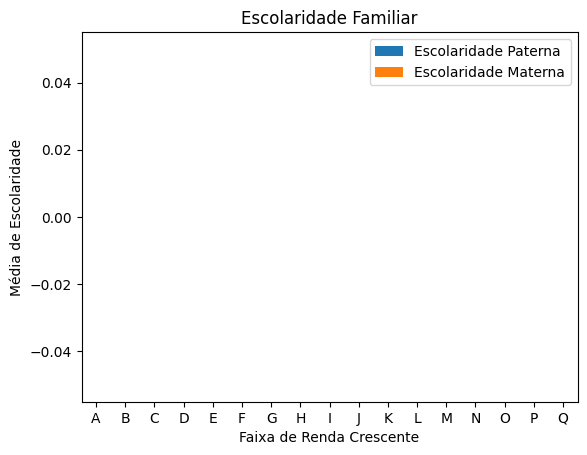

,Q001,Q002
Q006,,
A,NaN,NaN
B,NaN,NaN
C,NaN,NaN
D,NaN,NaN
E,NaN,NaN


In [9]:
#filtros pra tirar as pessoas que não sabem a escolaridade dos pais
naosei_masculino = df['Q001'] == 'H'
weissnicht_herr = ~ naosei_masculino
naosei_feminino = df['Q002'] == 'H'
weissnicht_frau = ~ naosei_feminino

filtros = weissnicht_herr | weissnicht_frau
df = df[filtros]

colunas_escolaridade = ['Q001', 'Q002'] 
letra_pra_numero = {
    'A': 0,
    'B': 1,
    'C': 2,
    'D': 3,
    'E': 4,
    'F': 5,
    'G': 6}

for coluna in colunas_escolaridade:
    df[coluna] = df[coluna].map(letra_pra_numero).astype(float)

df_agrupado_escolaridade = df.groupby('Q006')[colunas_escolaridade].mean()
escolaridade_familiar = df[colunas_escolaridade].mean()

mito = ['Escolaridade Paterna', 'Escolaridade Materna']

plt.figure(figsize=(15,15))
grafico_two = df_agrupado_escolaridade.plot.bar()
grafico_two.legend(mito)
plt.ylabel('Média de Escolaridade')
plt.xlabel('Faixa de Renda Crescente')
plt.xticks(rotation=0)
plt.title('Escolaridade Familiar')
plt.show()

df_agrupado_escolaridade.head()

<Figure size 1500x1500 with 0 Axes>

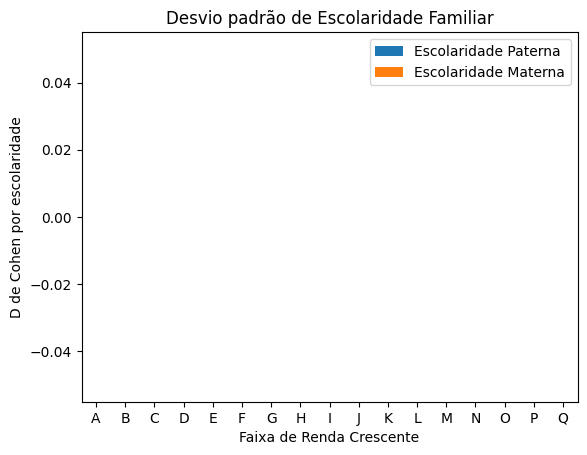

,Q001,Q002
Q006,,
A,NaN,NaN
B,NaN,NaN
C,NaN,NaN
D,NaN,NaN
E,NaN,NaN


In [8]:

df_agrupado_escolaridade = df.groupby('Q006')[colunas_escolaridade].mean()
escolaridade_familiar = df[colunas_escolaridade].mean()
desvio = df[colunas_escolaridade].std(axis=0)

d_cohen_intelectual = (df_agrupado_escolaridade - escolaridade_familiar) / desvio

mito = ['Escolaridade Paterna', 'Escolaridade Materna']

plt.figure(figsize=(15,15))
grafico_two = d_cohen_intelectual.plot.bar()
grafico_two.legend(mito)
plt.ylabel('D de Cohen por escolaridade')
plt.xlabel('Faixa de Renda Crescente')
plt.xticks(rotation=0)
plt.title('Desvio padrão de Escolaridade Familiar')
plt.show()

df_agrupado_escolaridade.head()